In [ ]:
! pip install shap

In [2]:
import xgboost
import shap

In [3]:
# train XGBoost model
X, y = shap.datasets.adult()
model = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X, y)

In [4]:
# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X[:1000])

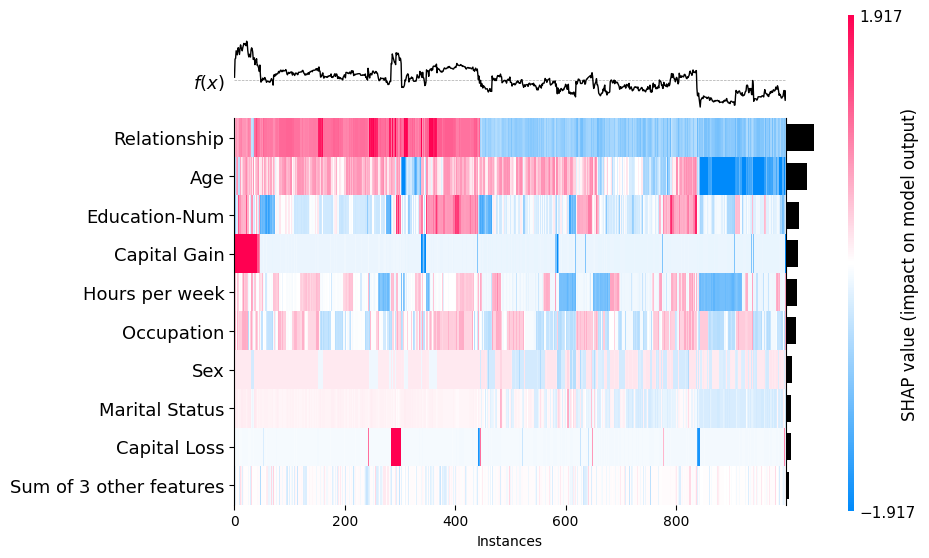

<Axes: xlabel='Instances'>

In [5]:
shap.plots.heatmap(shap_values)

行表示不同的樣本，列表示不同的特徵，數值代表每個特徵對該樣本預測結果的影響大小和方向（正面或負面）。

通過熱力圖，可以快速發現某些特徵對大多數樣本具有相似的影響，也能識別在不同樣本之間影響不同的特徵。

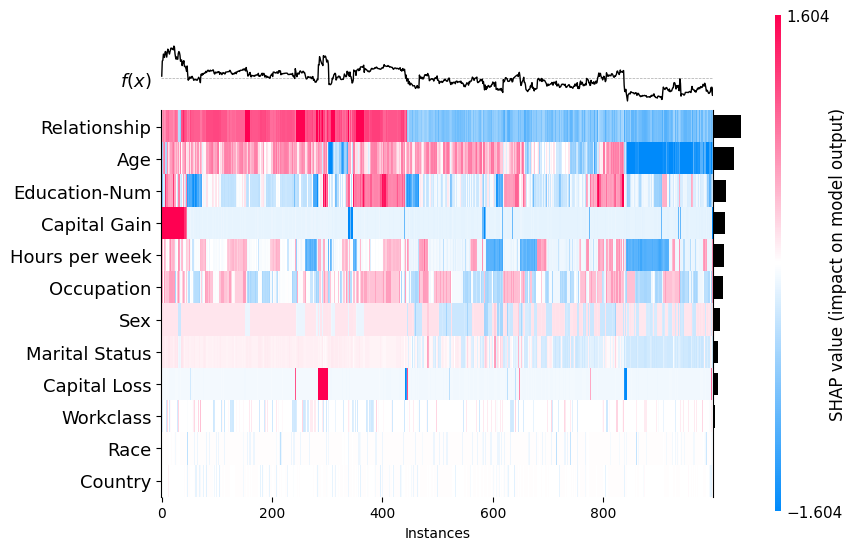

<Axes: xlabel='Instances'>

In [6]:
shap.plots.heatmap(shap_values, max_display=12)

# Changing sort order and global feature importance values

依照所有樣本中特徵的最大絕對值進行排序

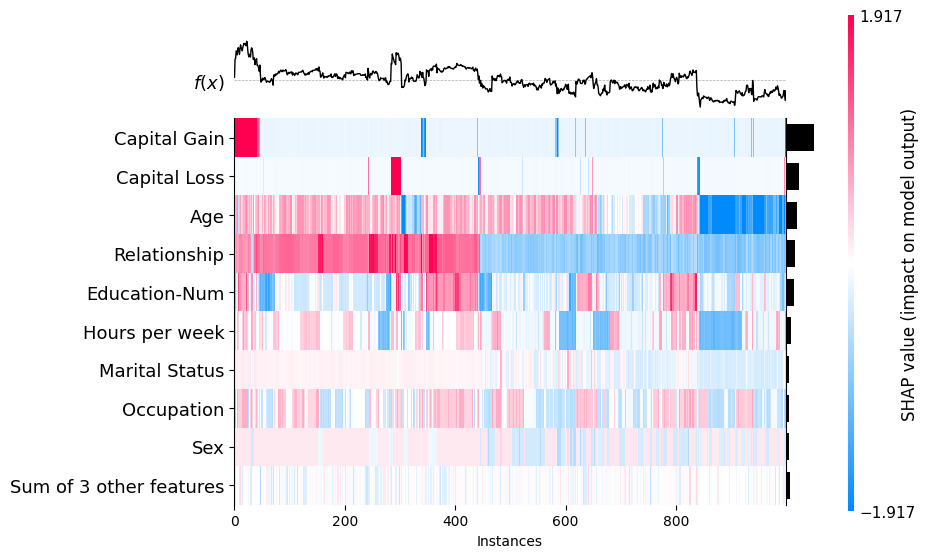

<Axes: xlabel='Instances'>

In [7]:
shap.plots.heatmap(shap_values, feature_values=shap_values.abs.max(0))

使用instance_order參數來控制實例的順序。

將樣本按照它們的 SHAP 值總和進行排序。這樣，影響最大的樣本會被排在圖表的上方，而影響較小的樣本會排在下方。這使得我們可以更清楚地觀察到哪些樣本的特徵對預測結果產生了較大的累積影響。

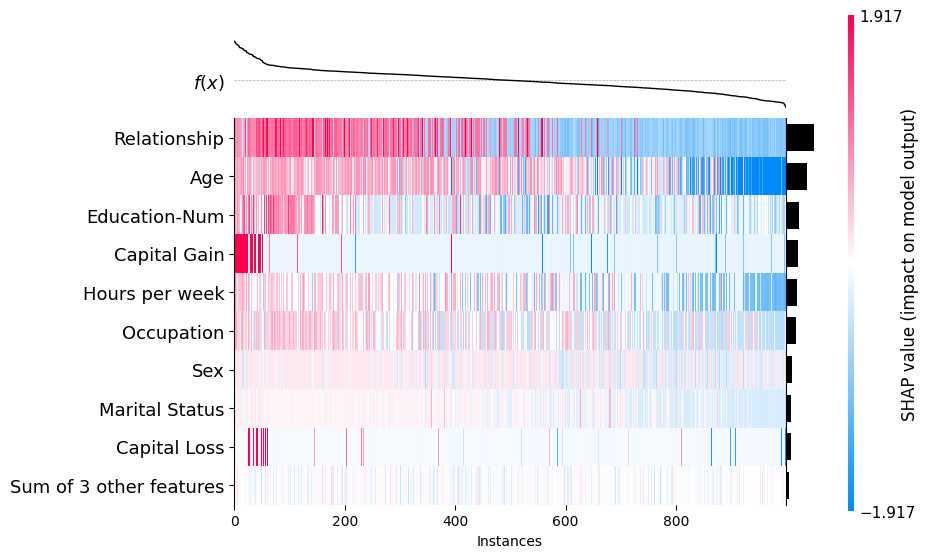

<Axes: xlabel='Instances'>

In [8]:
shap.plots.heatmap(shap_values, instance_order=shap_values.sum(1))

https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/heatmap.html